<a href="https://colab.research.google.com/github/edamulayimoglu/hu-bby261-2021-proje4/blob/main/Proje_4_Makine_%C3%96%C4%9Frenimi_ile_km_mil_d%C3%B6n%C3%BC%C5%9F%C3%BCm%C3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the number of estimates in kilometers:15
15 number to guess
Enter number of repetitions: 15
Model 15 it will be repeated  times.
-3.0 kilometre = -1.86 mil
7.0 kilometre = -4.34 mil
4.0 kilometre = 2.48 mil
10.0 kilometre = 6.21 mil
17.0 kilometre = 10.56 mil
25.0 kilometre = 15.53 mil
40.0 kilometre = 24.85 mil
52.0 kilometre = 32.31 mil
76.0 kilometre = 47.22 mil
173.0 kilometre = 107.49 mil
**Finished training the model.**
Preparing your chart.
Doğru sayı : 9.3
Modelin tahmini : [[10.180589]]


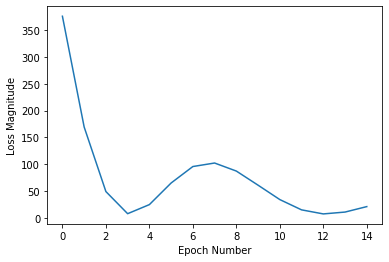

In [3]:
from numpy.core.arrayprint import IntegerFormat
import tensorflow as tf
import numpy as np
import logging
import matplotlib.pyplot as plt
import time
#
tahminSayi=int(input("Enter the number of estimates in kilometers:"))
print(str(tahminSayi) + " number to guess")
time.sleep(2)
tekrarSayi=int(input("Enter number of repetitions: "))
print("Model " + str(tekrarSayi) + " it will be repeated  times.")
time.sleep(2)

logger = tf.get_logger()
logger.setLevel(logging.ERROR)

km    = np.array([ -3, 7, 4, 10, 17, 25, 40, 52, 76, 173],  dtype=float)
mil = np.array([ -1.86, -4.34, 2.48, 6.21, 10.56, 15.53, 24.85, 32.31, 47.22, 107.49],  dtype=float)

for i,c in enumerate(km):
  print("{} kilometre = {} mil".format(c, mil[i]))

l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([l0])
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

history = model.fit(km, mil, epochs=tekrarSayi, verbose=False)

print("**Finished training the model.**")
print("Preparing your chart.")
time.sleep(2)

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

dogruTahmin = float(tahminSayi) * 0.62
print("Doğru sayı : " + str(dogruTahmin))
tahminSonuc = model.predict([tahminSayi])
print("Modelin tahmini : " + str(tahminSonuc))